In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load the dataset weatherHistory.csv

In [2]:
df = pd.read_csv('weatherHistory.csv')
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


### Get rid of non-numerical columns of the dataset

In [3]:
def del_non_num_col(_df):
    """This function delet all non numerical columns"""
    col_list = _df.columns.tolist()
    for i in range(len(col_list)):
        if str(_df[col_list[i]].dtypes) == 'object':
            _df=_df.drop(columns=[col_list[i]])
    return _df
df = del_non_num_col(df)
df.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51


### Use 'Temperature (C)' as your target variable. Plot the relationship of each of the numerical features with the target variable

Which is your target variable : Temperature (C)


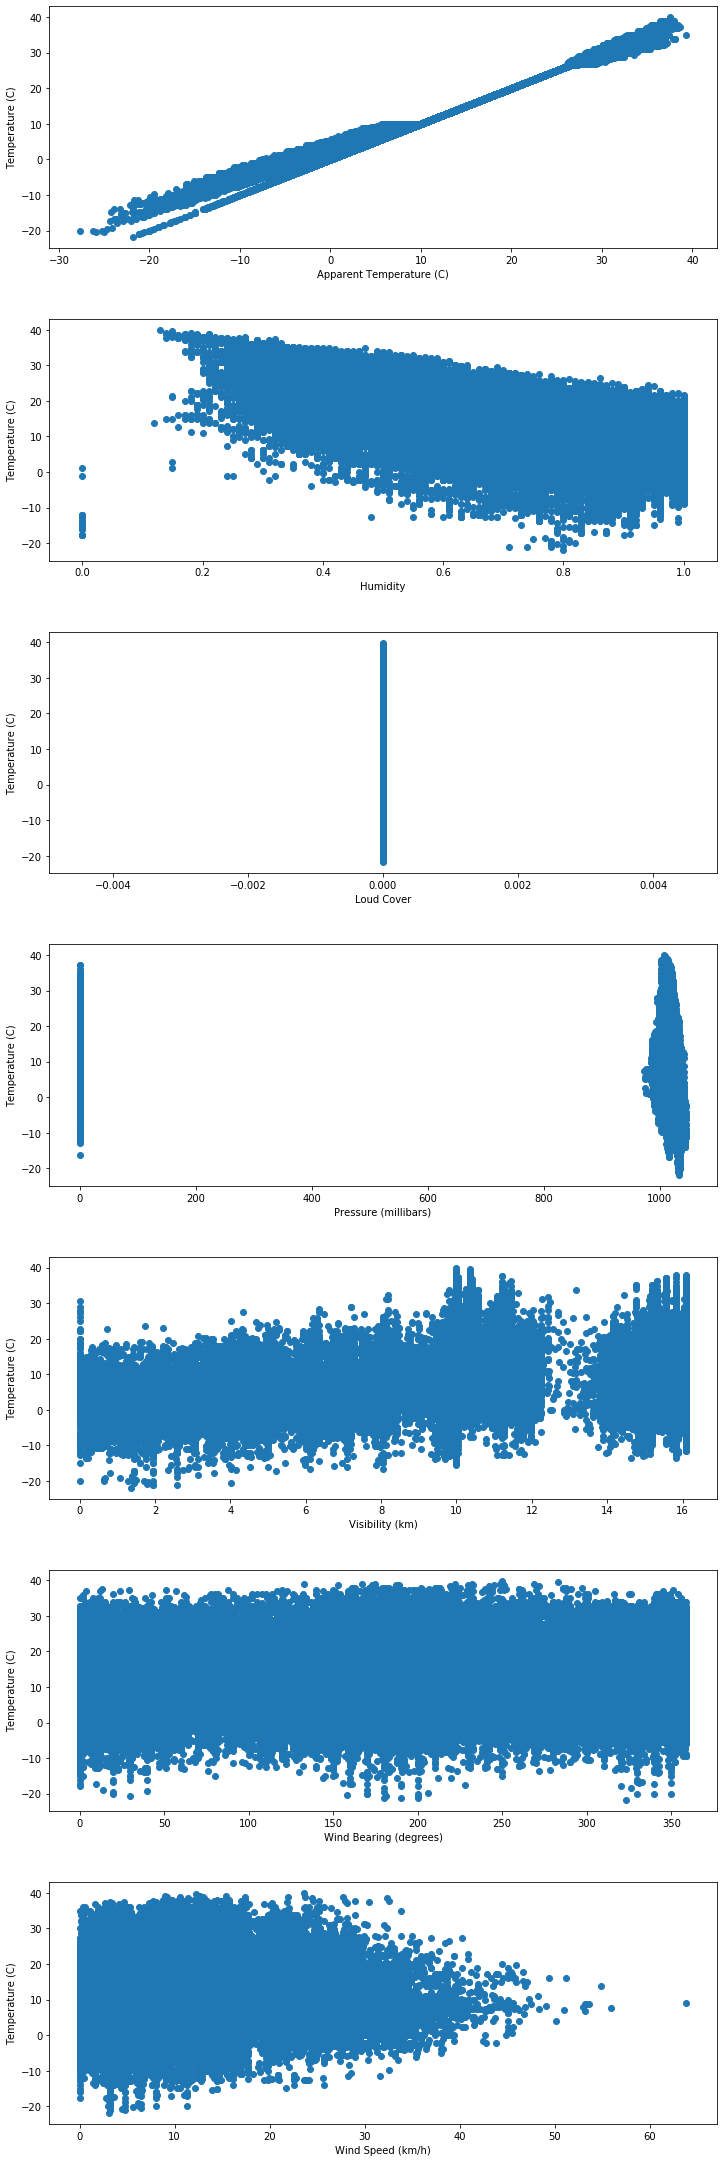

In [4]:
col_name = df.columns.tolist()
flag = True
while flag:
    leabel = str(input('Which is your target variable : '))
    for i in range(len(col_name)):
        if leabel == col_name[i]:
            flag = False
            break
    if flag:
        print("Your target variable is incorrect PLEASE copy target variable name of dataset")
fig, axs = plt.subplots(len(df.columns.difference([leabel])),1)
fig.set_figwidth(10)
fig.set_figheight(30)
fig.tight_layout(h_pad = 5)

coloms = df.columns.difference([leabel]).tolist()

for i in range(len(coloms)):
    axs[i].scatter(df[coloms[i]], df[leabel])
    axs[i].set_xlabel(coloms[i])
    axs[i].set_ylabel(leabel)

plt.show()

### Leave only one feature that has a linear relationship with the target variable.

In [6]:
print(df.head(1))
flag = True
while flag:
    print('Input one feature variable')
    feature = str(input('Which is your feature variable : '))
    for i in range(len(col_name)):
        if feature == col_name[i] and feature!=leabel:
            flag = False
            break
    if flag:
        print("Your feature variable is incorrect PLEASE copy feature variable name of dataset")
ln_df = df[[feature, leabel]]
ln_df

   Temperature (C)  Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0         9.472222                  7.388889      0.89            14.1197   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  
0                   251.0          15.8263         0.0               1015.13  
Input one feature variable
Which is your feature variable : 0.2
Your feature variable is incorrect PLEASE copy feature variable name of dataset
Input one feature variable
Which is your feature variable : Humidity


,Humidity,Temperature (C)
0,0.89,9.472222
1,0.86,9.355556
2,0.89,9.377778
3,0.83,8.288889
4,0.83,8.755556
...,...,...
96448,0.43,26.016667
96449,0.48,24.583333
96450,0.56,22.038889
96451,0.60,21.522222


### Divide the dataset into training and test sets with the ratio 80:20.

In [7]:
while True:
    print('Please input test size 0.0 to 1.0')
    test_size = float(input('Test size ='))
    if 0 < test_size < 1:
        break
        
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(ln_df[ln_df.columns.difference([leabel])], 
                                                ln_df[leabel], test_size=0.2, random_state=20)
print('Train lengt =',len(xTrain))
print('Test lengt =',len(xTest)) 

Please input test size 0.0 to 1.0
Test size =0.2
Train lengt = 77162
Test lengt = 19291


### Implement a function fit_ridge_regression

In [8]:
def fit_ridge_regression(data_vector, response_vector, l=1):
    """
    :param data_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x)
    :param response_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is label (y)
    :param l: ridge variable
    :return: numpy array beta of coefficients of the regression
    """
    data_vector = pd.DataFrame(data_vector)
    data_vector['ones']=1
    col = list(data_vector.columns)
    data_vector = data_vector[['ones']+col[0:-1]]
    #x.T*x = b
    b = data_vector.T.dot(data_vector)
    #b + lI
    b_1 = b + l*np.identity(len(b))
    if np.linalg.det(b_1) != 0:
        beta = np.linalg.inv(b_1).dot(data_vector.T).dot(response_vector)
    else:
        print('We can`t calculate invers')
    return beta

### Implement a function fit_polynomial_regression

In [9]:
def fit_polynomial_regression(data_vector, response_vector, degree=2, l=1):
    """
    :param data_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x)
    :param response_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is label (y)
    :return: numpy array beta of coefficients of the regression
    """
    data_vector = pd.DataFrame(data_vector)
    for i in range(2, degree + 1):
        coll = list(data_vector.columns)
        data_vector_s = pd.Series(data_vector[coll[0]] ** i)
        data_vector = pd.concat([data_vector,data_vector_s], axis=1,ignore_index=True)       
    beta = fit_ridge_regression(data_vector, response_vector, l=l)
    return beta

### Use the resulting train and test sets with the previous 2 functions to fit ridge regression and polynomial regression lines.

In [10]:
train_reg = fit_ridge_regression(xTrain[feature],yTrain)
print('My function train ridge regression = ', train_reg)
test_reg = fit_ridge_regression(xTest[feature], yTest)
print('My function test ridge regression = ', test_reg)
train_poly_reg = fit_polynomial_regression(xTrain[feature],yTrain,degree=2)
print('My function train polynomial regression = ', train_poly_reg)
test_poly_reg = fit_polynomial_regression(xTest[feature], yTest, degree=2)
print('My function test polynomial regression = ',test_poly_reg)

My function train ridge regression =  [ 34.64130516 -30.88993572]
My function test ridge regression =  [ 34.50498359 -30.76110252]
My function train polynomial regression =  [ 39.53845711 -47.22619471  12.29119752]
My function test polynomial regression =  [ 38.44922871 -43.92133649   9.90597898]


### Calculate RMSE (root mean squared error) for ridge and polynomial regressions

In [11]:
from sklearn.metrics import mean_squared_error

r_y_prd_train, p_y_prd_train = [], []
for x in xTrain[feature]:
    r_y_prd_train.append(sum([train_reg[i] * x ** i for i in range(len(train_reg))]))
    p_y_prd_train.append(sum([train_poly_reg[i] * x ** i for i in range(len(train_poly_reg))]))

rmse_r = np.sqrt(mean_squared_error(yTrain, r_y_prd_train))
rmse_p = np.sqrt(mean_squared_error(yTrain, p_y_prd_train))
print('RMSE_r = ', rmse_r)
print('RMSE_p = ', rmse_p)

RMSE_r =  7.398757379246442
RMSE_p =  7.381484983500254


### Now fit the ridge and polynomial regressions to your data using sklearn and compare the results with your own fit_1d_linear_regression function. Use RMSE for comparison.

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

In [13]:
pol_feat = PolynomialFeatures(2)
x_train_p = pol_feat.fit_transform(np.array(xTrain[feature]).reshape(-1, 1))

pol_model = LinearRegression()
pol_model.fit(x_train_p, yTrain)

y_train_predicted_p = pol_model.predict(x_train_p)

rmse_train_p = np.sqrt(mean_squared_error(yTrain, y_train_predicted_p))

rige_reg = Ridge(alpha=1)

rige_reg.fit(x_train_p, yTrain)
y_train_predicted_r = rige_reg.predict(x_train_p)

rmse_train_r = np.sqrt(mean_squared_error(yTrain, y_train_predicted_r))

print('Sklearn polynomial regressions rmse_train = ', rmse_train_p)
print('Sklearn ridge regressions rmse_train = ', rmse_train_r)

Sklearn polynomial regressions rmse_train =  7.381420554378321
Sklearn ridge regressions rmse_train =  7.381464468370138


### Use any additional visualizations that may help during your analysis.

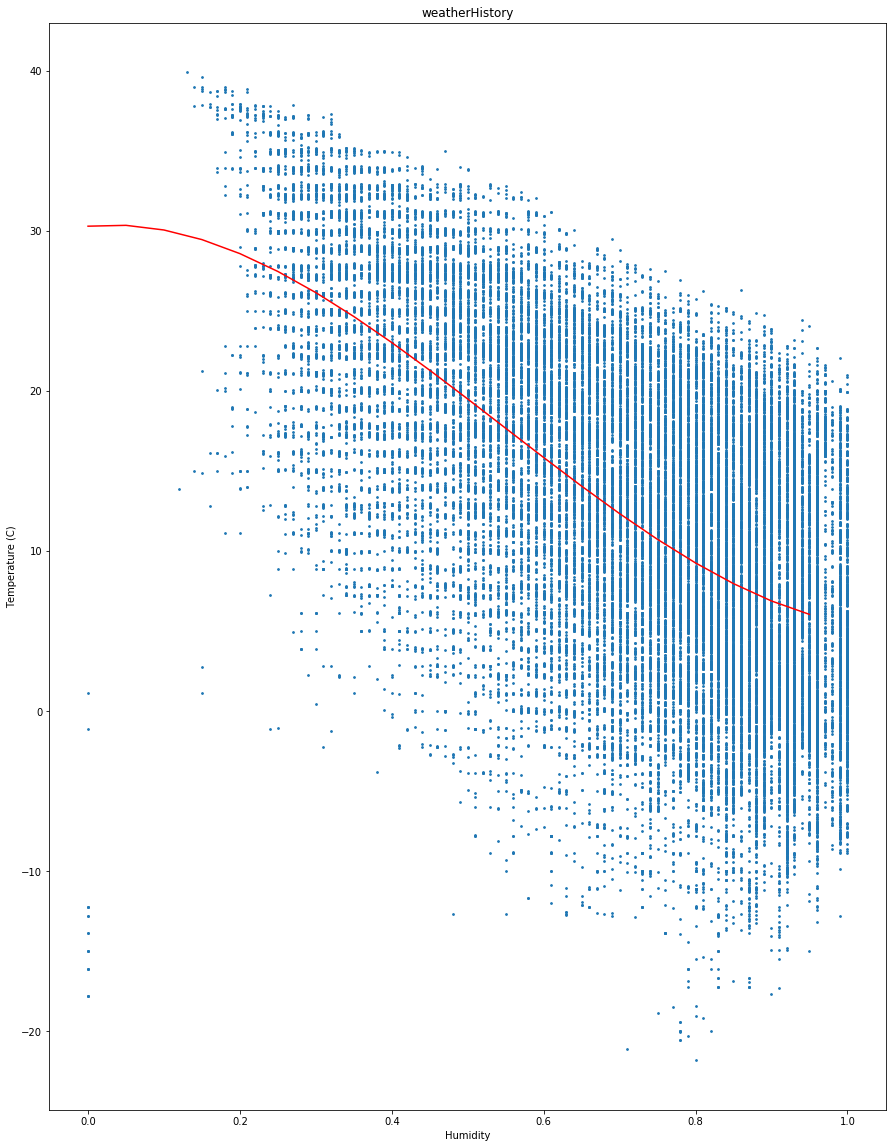

In [24]:
plt.figure(figsize=(15,20))
plt.scatter(xTrain, yTrain, s=3)
plt.xlabel(feature)
plt.ylabel(leabel)
plt.title('weatherHistory')

curve_x = np.arange(0, 1, 0.05)
pol_reg = fit_polynomial_regression(xTrain[feature], yTrain, degree=3)
curve_y = [sum(rig_reg[i] * x ** i for i in range(len(rig_reg))) for x in curve_x]
plt.plot(curve_x, curve_y, color='red')
plt.show()